In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15, 10

# Neural Network rolling exercise Part II

In these exercises you will build step by step a complete neural network from scratch using only NumPy (!)<br>
In this part we will implement the activation functions we saw in class to create a complete forward pass of a non-linear neural network.

# Activation function implementation

**Question 1:**
Implement the following __[activation functions](https://en.wikipedia.org/wiki/Activation_function)__ as we saw in class:
* Step function
* ReLU
* Sigmoid
* Softmax 


 **Hint:** Make sure that the tests given below pass.

In [2]:
class step_function:
    @staticmethod
    def apply(x):
        return np.where(x > 0, 1, 0)

class sigmoid:
    @staticmethod
    def apply(x):
        return 1 / (1 + np.exp(-x))

class ReLU:
    @staticmethod
    def apply(x):
        return np.maximum(0, x)

class softmax:
    @staticmethod
    def apply(x):
        exp_vals = np.exp(x - np.max(x)) 
        return exp_vals / np.sum(exp_vals)


In [3]:
### TESTS FOR ACTIVATION FUNCTIONS ###
x = np.array([-0.75626106,  0.03769935,  1.30103112,  1.00382471, -0.35854299])
assert (step_function.apply(x) == np.array([0., 1., 1., 1., 0.])).all()
assert (np.isclose(sigmoid.apply(x), np.array([0.31945858, 0.50942372, 0.78600847, 0.7318099 , 0.41131231]))).all()
assert (np.isclose(ReLU.apply(x), np.array([0., 0.03769935, 1.30103112, 1.00382471, 0.]))).all()
assert (np.isclose(softmax.apply(x), np.array([0.05453082, 0.12062981, 0.4266902 , 0.31698416, 0.081165]))).all()

**Question 2:**
What is the shape of the output of the activation function compared to the shape of the input? Is it different? <br>
Check that your implementation is correct:

In [4]:
activation_functions = [step_function, sigmoid, ReLU, softmax]

for activation_func in activation_functions:
    x = np.random.normal(0, 1, size=10)
    print("Input Shape:", x.shape)
    output = activation_func.apply(x)
    print("Output Shape:", output.shape)
    print()

Input Shape: (10,)
Output Shape: (10,)

Input Shape: (10,)
Output Shape: (10,)

Input Shape: (10,)
Output Shape: (10,)

Input Shape: (10,)
Output Shape: (10,)



We can see the shape is the same for every input and output.
Activation functions don't alter the shape of their input, they operate element-wise, maintaining the same shape for both input and output.

# Layer and Network classes implementation

**Question 3:** Copy-paste your `Layer` and `Network` classes from part I. Refactor the `Layer` class and add non-linearity: 
- Add an activation function as a property to the `Layer` class. (Notice that the `__init__` func signature changed)
- Add an activation function call in the `Layer.apply()` function.



 **Hint:** Make sure that the tests given below pass.

In [5]:
class Layer:
    def __init__(self, weights, bias, activation_func=None):
        # Initialize the layer with the given weights matrix, bias vector, and activation function
        self.weights = weights
        self.bias = bias
        self.activation = activation_func

    def apply(self, x_in):
        # Calculate the layer output on the given x_in using layer weights and bias,
        # then apply the activation function if it's specified
        output = np.dot(self.weights, x_in) + self.bias
        if self.activation:
            output = self.activation.apply(output)
        return output

        
class Network:
    def __init__(self, layers=None):
        # Initialize the network with the given layers
        if layers is None:
            self.layers = []
        else:
            self.layers = layers

    def add_layer(self, new_layer):
        # Add a layer to the network
        self.layers.append(new_layer)

    def forward(self, x):
        # Do a forward pass of the network on the given input
        # Return the output of the network
        output = x
        for layer in self.layers:
            output = layer.apply(output)
        return output

In [6]:
### TESTS FOR NETWORK CLASS WITH NON-LINEARITY ###
L1 = Layer(np.array([[1, 0], [0, 1]]), bias=np.array([1, 2]), activation_func=ReLU)
L2 = Layer(np.array([[-1, 3], [2, 2], [1, 4]]), bias=np.array([0, 0, -5]), activation_func=sigmoid)
N = Network(layers=[L1, L2])
assert np.isclose(N.forward(np.array([1., 1.5])), np.array([0.99979657, 0.9999833 , 0.9999833 ])).all()
L3 = Layer(np.array([[2, 2, -2]]), bias=np.array([-1]), activation_func=step_function)
N.add_layer(L3)
assert (N.forward(np.array([1., 1.5])) == np.array([1.])).all()

# XOR network

Now we will try to implement a __[XOR](https://en.wikipedia.org/wiki/Exclusive_or)__ operator again, this time with  our non-linear neural net implementation:

**Questions:**
4. Read section 6.1 in __[The Deep Learning Book](https://www.deeplearningbook.org/contents/mlp.html)__ (specifically equations 6.3 to 6.6) 
5. Initialize a network with two layers with the given weights and biases as specified in the link.
6. Use the given input and output of the XOR operator (`xs` and `ys`) and check your network's performance.
7. What is the shape of each input? what is the shape of each output? make sure your network receives and outputs numpy arrays with the correct dimensions.

In [7]:
xs = [
  np.array([0,0]),
  np.array([0,1]),
  np.array([1,0]),
  np.array([1,1])
]

ys = [
  np.array([0]),
  np.array([1]),
  np.array([1]),
  np.array([0])
]

In [8]:
# Define the weights and biases for the XOR network
W1 = np.array([[20, 20], [-20, -20]])
b1 = np.array([-10, 30])

W2 = np.array([20, 20])
b2 = np.array([-30])

# Define the layers
L1 = Layer(W1, b1, activation_func=sigmoid)
L2 = Layer(W2, b2, activation_func=sigmoid)

# Initialize the network
net = Network(layers=[L1, L2])

for x, y in zip(xs, ys):
    y_pred = net.forward(x)
    print(f'input: {x}; expected result: {y}; predicted result: {y_pred}')


input: [0 0]; expected result: [0]; predicted result: [4.54391049e-05]
input: [0 1]; expected result: [1]; predicted result: [0.99995452]
input: [1 0]; expected result: [1]; predicted result: [0.99995452]
input: [1 1]; expected result: [0]; predicted result: [4.54391049e-05]


In [9]:
# here we check our network performance
# we go over all of the examples in our dataset and compare the network predicted y to the true y
for x, y in zip(xs, ys):
    y_pred = net.forward(x)
    print(f'input: {x}; expected result: {y}; predicted result: {y_pred}')

input: [0 0]; expected result: [0]; predicted result: [4.54391049e-05]
input: [0 1]; expected result: [1]; predicted result: [0.99995452]
input: [1 0]; expected result: [1]; predicted result: [0.99995452]
input: [1 1]; expected result: [0]; predicted result: [4.54391049e-05]


#### Question 8: Can we implement XOR using this network? What changed?

Yes, we can implement XOR using this network. What changed from previous approaches is the addition of an activation function. Previously, we not using an activation function in the hidden layer, which made it impossible for the network to learn the non-linear XOR function.

# MNIST

Now we will build a network using pretrained weights to classify hand written digits from the __[MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database)__:

**Questions:**


9. Examine the data in `mnist__weights.npz` using the code given below as a starting point. What does each key represent?


In [10]:
npzfile = np.load('mnist__weights.npz')
# display the keys for saved data:
print('Keys:', *npzfile.keys())

Keys: l1_weights l2_weights l3_weights l1_bias l2_bias l3_bias x y categorical_y


    l1_weights: Weights for the first layer of the neural network.
    l2_weights: Weights for the second layer of the neural network.
    l3_weights: Weights for the third layer of the neural network.
    l1_bias: Biases for the first layer of the neural network.
    l2_bias: Biases for the second layer of the neural network.
    l3_bias: Biases for the third layer of the neural network.
    x: Input images from the MNIST dataset.
    y: Labels corresponding to the input images 
    categorical_y: Labels encoded in a categorical format (one-hot encoded labels).

In [11]:
l1_weights = npzfile['l1_weights']
l2_weights = npzfile['l2_weights']
l3_weights = npzfile['l3_weights']
l1_bias = npzfile['l1_bias']
l2_bias = npzfile['l2_bias']
l3_bias = npzfile['l3_bias']
x = npzfile['x']
y = npzfile['y']
categorical_y = npzfile['categorical_y']

# Print the shape of each array
print("l1_weights shape:", l1_weights.shape)
print("l2_weights shape:", l2_weights.shape)
print("l3_weights shape:", l3_weights.shape)
print("l1_bias shape:", l1_bias.shape)
print("l2_bias shape:", l2_bias.shape)
print("l3_bias shape:", l3_bias.shape)
print("x shape:", x.shape)
print("y shape:", y.shape)
print("categorical_y shape:", categorical_y.shape)


l1_weights shape: (128, 784)
l2_weights shape: (64, 128)
l3_weights shape: (10, 64)
l1_bias shape: (128,)
l2_bias shape: (64,)
l3_bias shape: (10,)
x shape: (1000, 784)
y shape: (1000,)
categorical_y shape: (1000, 10)


10. Build a network with the following architecture:
 - Input layer: size = 784, activation - sigmoid
 - Hidden layer 1: size = 128, activation - sigmoid
 - Hidden layer 2: size = 64, activation - softmax
 - Output layer: size = 10

Initialize the network weights and biases using the NumPy arrays in `mnist__weights.npz`

In [12]:
# initialize the layers of the MNIST network using the arrays in mnist__weights.npz file
# your code goes here
input = Layer(weights = npzfile['l1_weights'], bias = npzfile['l1_bias'],activation_func = sigmoid)
h1 = Layer(weights = npzfile['l2_weights'], bias = npzfile['l2_bias'], activation_func = sigmoid)
h2 = Layer(weights = npzfile['l3_weights'], bias = npzfile['l3_bias'], activation_func = softmax)
net = Network(layers = [input,h1,h2])

11. Use the following code to visualize the data and the predicted network output:

title of each image is the neural network predicted value:


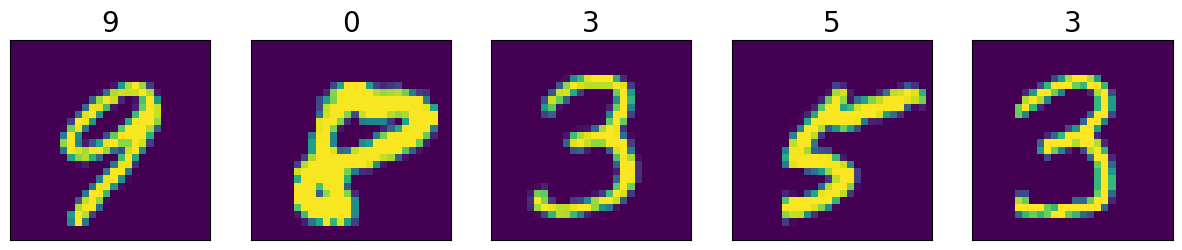

In [13]:

print('title of each image is the neural network predicted value:')
n_images = 5
idx = np.random.choice(np.arange(x.shape[0]), size=n_images, replace=False)

for i in range(n_images):
    plt.subplot(1, n_images, i+1)
    
    cur_idx = idx[i]
    cur_x = x[cur_idx]
    
    img = cur_x.reshape(28, 28)
    plt.imshow(img)
    
    res = net.forward(cur_x)
    label = res.argmax()
    plt.title(label, fontsize=20)
    plt.xticks(())
    plt.yticks(())
    
plt.show()

12. Calculate the accuracy of the network: <br>
Iterate over the entire dataset, perform a forward pass for each example and compare the predicted label to the true label.

In [14]:
# your code goes here
correct_count = 0
for index,row in enumerate(x):
  pred = net.forward(row).argmax()
  if pred == y[index]:
    correct_count +=1
accuracy = correct_count/x.shape[0]
print('accuracy : ', accuracy)

accuracy :  0.854


13. Change the activation functions of the layers and recompute the network accuracy. Did it change? is it better or worse? Is it what we expected?

In [15]:
# initialize the layers of the MNIST network using the arrays in mnist__weights.npz file
# your code goes here
input_layer = Layer(weights = l1_weights, bias = l1_bias, activation_func=softmax)
hidden_layer1 = Layer(weights = l2_weights, bias = l2_bias, activation_func=softmax)
hidden_layer2 = Layer(weights = l3_weights, bias = l3_bias, activation_func=sigmoid)

# Define the network architecture
network = Network(layers=[input_layer, hidden_layer1, hidden_layer2])


title of each image is the neural network predicted value:


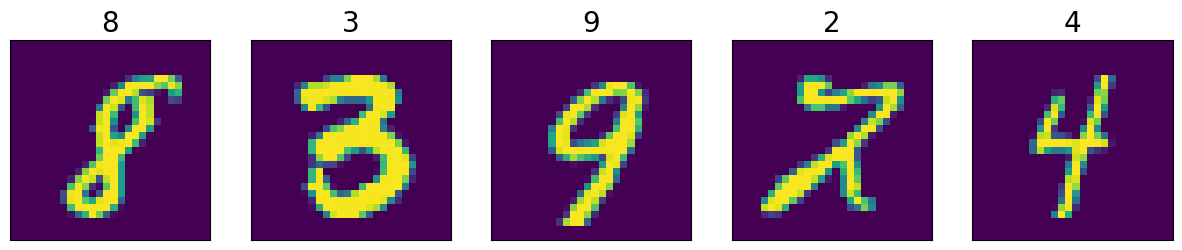

In [16]:
print('title of each image is the neural network predicted value:')
n_images = 5
idx = np.random.choice(np.arange(x.shape[0]), size=n_images, replace=False)

for i in range(n_images):
    plt.subplot(1, n_images, i+1)
    
    cur_idx = idx[i]
    cur_x = x[cur_idx]
    
    img = cur_x.reshape(28, 28)
    plt.imshow(img)
    
    res = net.forward(cur_x)
    label = res.argmax()
    plt.title(label, fontsize=20)
    plt.xticks(())
    plt.yticks(())
    
plt.show()

In [17]:
# your code goes here
correct_count = 0
for index,row in enumerate(x):
  pred = net.forward(row).argmax()
  if pred == y[index]:
    correct_count +=1
accuracy = correct_count/x.shape[0]
print('accuracy : ', accuracy)

accuracy :  0.854


In [ ]:
We got exactly the same accuracy, it seems that the activation functions in this case provide the same performanc